In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
sp1950 = yf.download('^GSPC', start='1950-01-01')
nya1965 = yf.download('^NYA', start='1965-01-01')
nasdaq1965 = yf.download('^IXIC', start='1965-01-01')
wilshire1990 = yf.download('^W5000', start='1990-01-01')

path = '../data'
sp1950.to_csv(f'{path}/sp1950.csv')
nya1965.to_csv(f'{path}/nya1965.csv')
nasdaq1965.to_csv(f'{path}/nasdaq1965.csv')
wilshire1990.to_csv(f'{path}/wilshire1990.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 50 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 50
symbols = ['^NYA', '^IXIC']
tickers = {'^NYA': 'nyse',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv'}

ITERS: 50





NYSE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1972-01-31
Successfully loaded params from ../data/pct_params/nyse_50yr_3param.json
{   'params': {   'amounts': [0.99, -0.7506115758337844, 0.04419329038146301],
                  'qs': [   0.2636202194483754,
                            0.05176684887959276,
                            -0.7641686403988508]},
    'sd': 0.0212727836511827,
    'window': 54}
 1: Final value: $17975.00 (window = 54; sd = 0.021)
 2: Final value: $19462.53 (window = 45; sd = 0.021)
New best model!
{   'amounts': [0.99, -0.7184365939125169, 0.09096338213249922],
    'qs': [0.247366873283269, 0.023688283663096055, -0.7407449871862165]}
50: Final value: $ 9090.11 (window = 65; sd = 0.020))
% in now: 1.0
Actions taken: 786
Wrote params to ../data/pct_params/nyse_50yr_3param.json


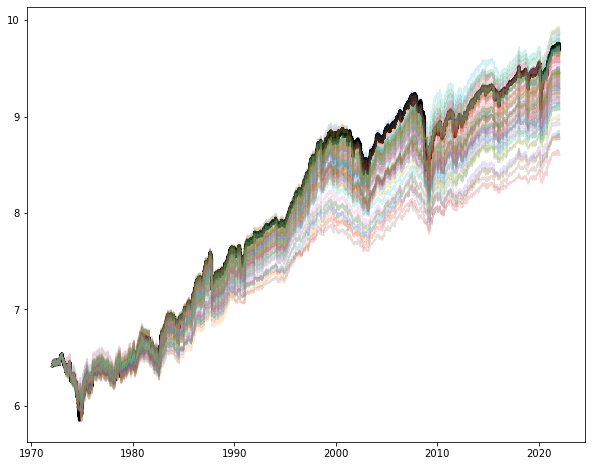

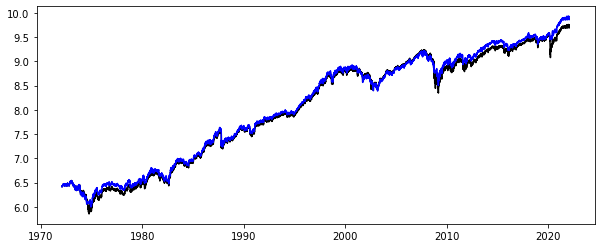

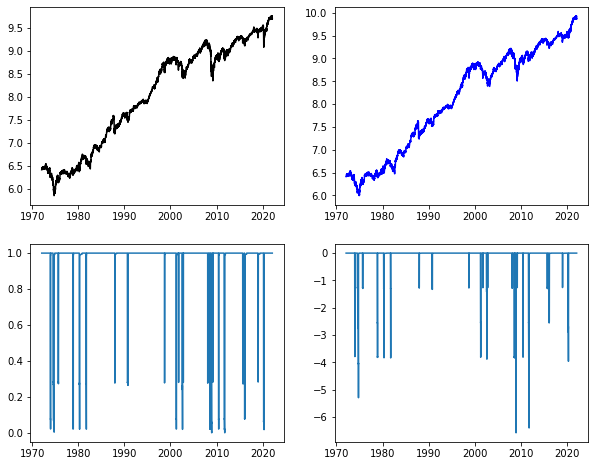



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1972-01-31
Successfully loaded params from ../data/pct_params/nyse_50yr_2param.json
{   'params': {   'amounts': [0.99, -0.14958757081357005],
                  'qs': [-0.5771816111785719, -0.26560555231494787]},
    'sd': 0.05128513591905961,
    'window': 222}
 1: Final value: $16801.88 (window = 222; sd = 0.051)
50: Final value: $  877.99 (window = 228; sd = 0.031)
% in now: 0.724949925067614
Actions taken: 362
Wrote params to ../data/pct_params/nyse_50yr_2param.json


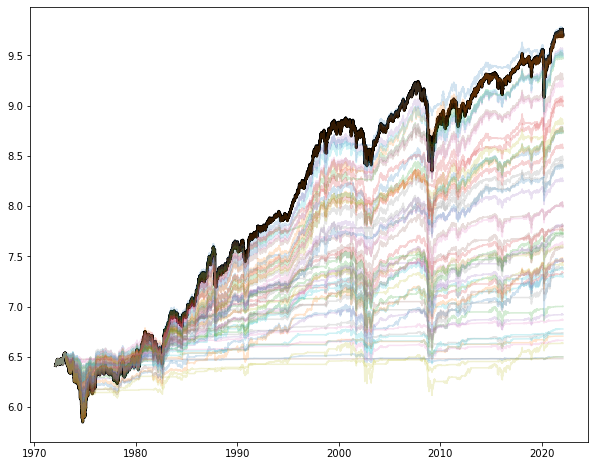

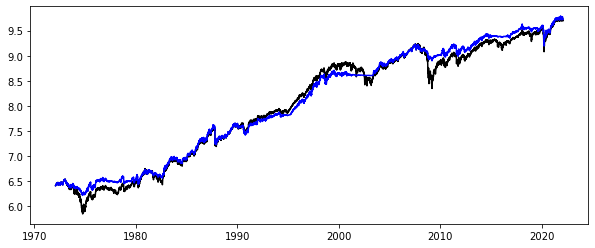

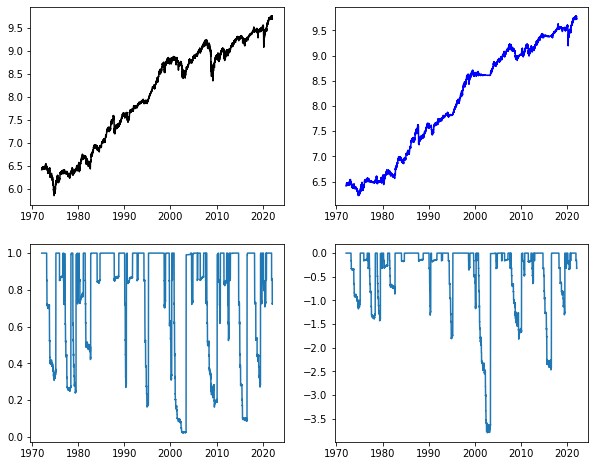



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1972-01-31
Successfully loaded params from ../data/pct_params/nyse_50yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.25008467906597853]},
    'sd': 0.21783112010651517,
    'window': 20}
 1: Final value: $16397.86 (window = 20; sd = 0.218)
50: Final value: $16397.86 (window = 974; sd = 0.133))
% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nyse_50yr_1param.json


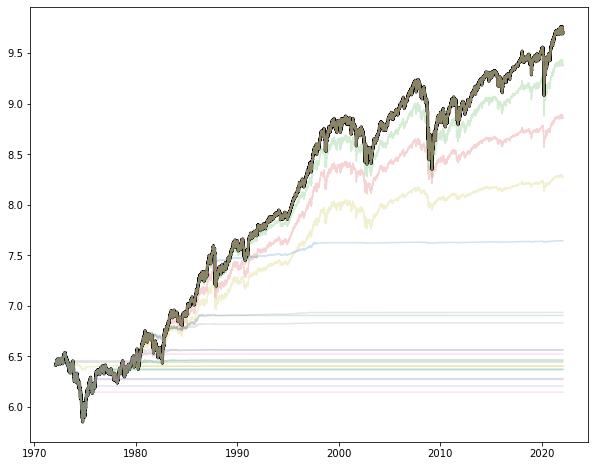

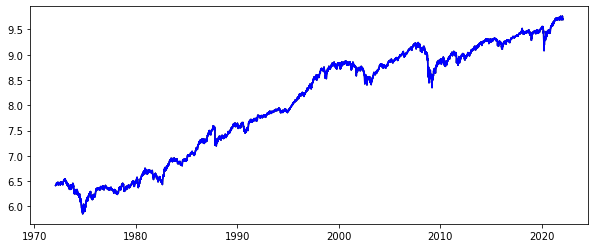

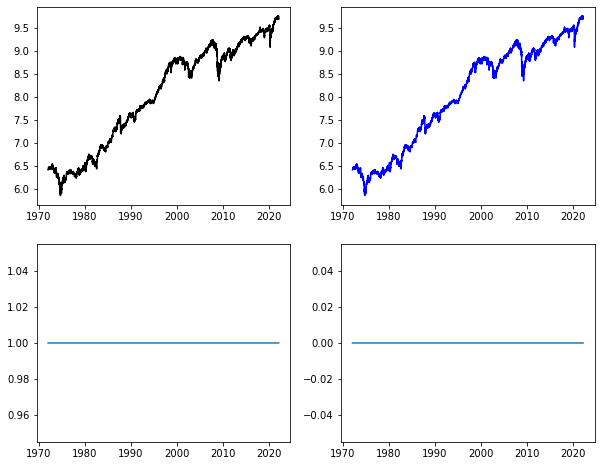




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 1972-01-31
Successfully loaded params from ../data/pct_params/nasdaq_50yr_3param.json
{   'params': {   'amounts': [-0.99, 0.99, 0.99],
                  'qs': [   0.04096408114976097,
                            0.2769043885489338,
                            -0.020652991502051687]},
    'sd': 0.05727165178489664,
    'window': 40}
 1: Final value: $29860.51 (window = 40; sd = 0.057)
50: Final value: $  117.76 (window = 149; sd = 0.035)
% in now: 1.0
Actions taken: 480
Wrote params to ../data/pct_params/nasdaq_50yr_3param.json


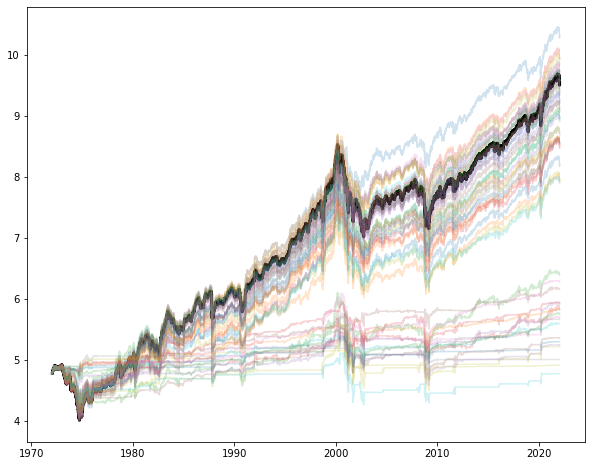

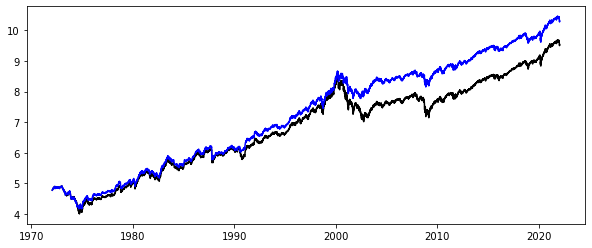

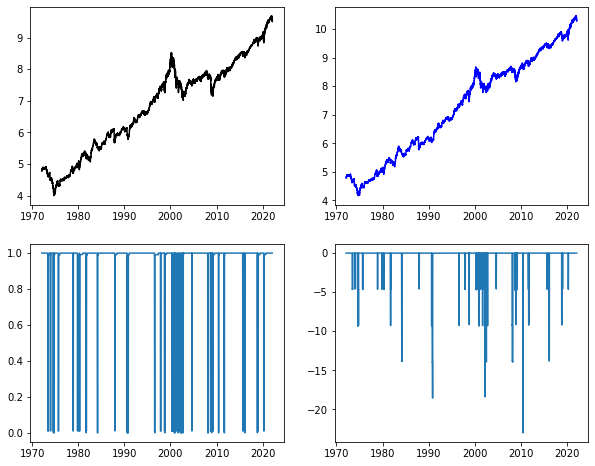



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 1972-01-31
Successfully loaded params from ../data/pct_params/nasdaq_50yr_2param.json
{   'params': {   'amounts': [-0.99, 0.99],
                  'qs': [-0.05640356270901736, 0.21465217686930005]},
    'sd': 0.07374529544437246,
    'window': 40}
 1: Final value: $35482.64 (window = 40; sd = 0.074)
50: Final value: $ 5277.35 (window = 68; sd = 0.045))
% in now: 0.009805679756193042
Actions taken: 416
Wrote params to ../data/pct_params/nasdaq_50yr_2param.json


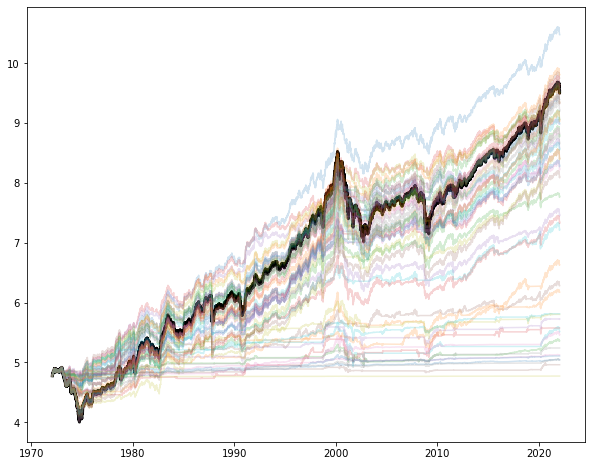

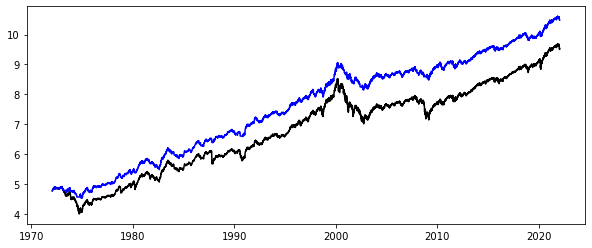

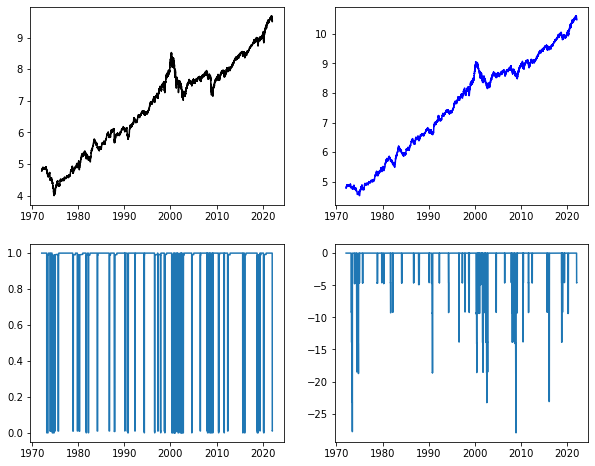



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 1972-01-31
Successfully loaded params from ../data/pct_params/nasdaq_50yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.46936017411731346]},
    'sd': 0.21783112010651517,
    'window': 20}
 1: Final value: $13770.57 (window = 20; sd = 0.218)
50: Final value: $13770.57 (window = 378; sd = 0.133)
% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_50yr_1param.json


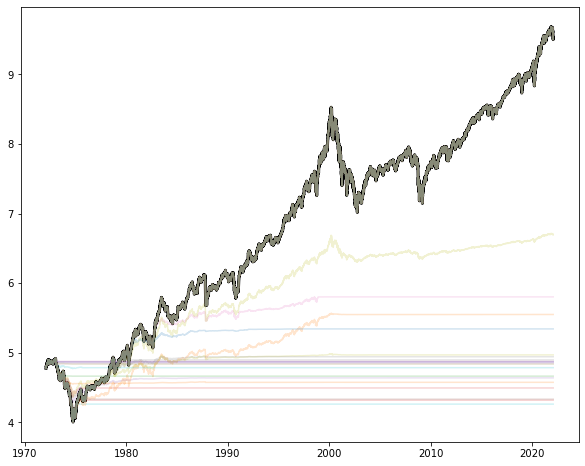

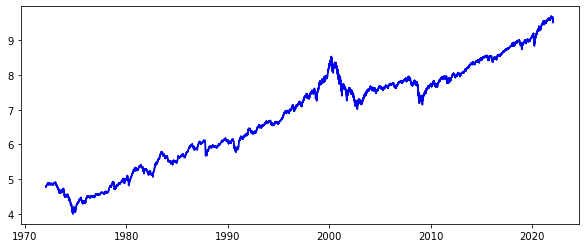

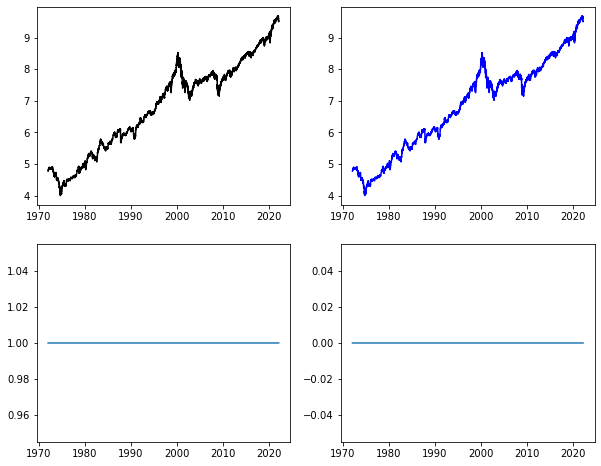

Percents in:
nyse: [1.0, 0.7249, 1.0]
nasdaq: [1.0, 0.0098, 1.0]


In [5]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    percent_in[ticker] = []
    path = paths[symbol]
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')